# Numerisk løsning av enkel harmonisk pendel

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 1

**Forkunnskaper:** Programmeringskunnskaper tilsvarende det opparbeidet i ITGK og FY1001, spesielt bruk av Euler metoden for å løse differensialligninger. 

**Læringsmål:** Løsning av andreordens ordinær differensialligning med Euler-metoden, numerisk stabilitet for Euler metoden og grafisk fremstilling av data. 

---

I denne øvingen skal vi se på enkel harmonisk pendelbevegelse til en punktmasse. I denne modellen henger en punktmasse fra en masseløs, utøyelig snor. Vi skal først se på den analytiske løsningen av ligningen, og plotte vinkelutslaget. Deretter går vi over til numerisk løsning ved Euler-metoden, som dere ble kjent med i FY1001 Mekanisk fysikk.  

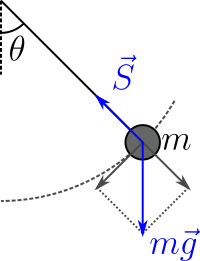
<span align="center"><strong>Figur 1:</strong> <em>Enkel pendel med masse $m$ og utslagsvinkel $\theta$.</em></span>


I figur 1 er kreftene som virker på massen som henger fra snora vist. Her er $\vec{S}$ snorkrafta og $m\vec{g}$ gravitasjonskraften. Vi antar her at kun disse to kreftene virker på massen.

## Oppgave 1 – Analytisk løsning av bevegelsesligningen for pendelen

**a)** Vis at bevegelsesligningen for pendelen er gitt ved
$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$
hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.


---

SKRIV HER (eller på papir)

---

Anta at vinkelutslaget er lite, slik at vi kan anta $\sin \theta \approx \theta$. Bevegelsesligningen er da gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \theta.
\end{equation}

Den analytiske løsningen av bevegelsesligningen over er

\begin{equation}
 	\theta(t) = \theta_0 \cos(\w_0 t + \phi),
\end{equation}

der $\w_0 = \sqrt{g/l}$ er vinkelfrekvensen og $\phi$ er fasen.

**b)** Plot den analytiske løsningen for vinkelutslaget, $\theta(t)$, som funksjon av tid, $t$, fram til $t=10$ s. 

Bruk følgende parametere og initialbetingelser:
- Lengden av snora, $l = 1.0$ m
- Massen til pendelen, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8$ $\text{m}/\text{s}^2$
- Startvinkelen til pendelarmen med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\dot{\theta}_0 = 0.0$ rad/s

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# To show figures in the notebook
%matplotlib inline

# Define parameters and initial conditions
m = 5              # [kg], mass 
l = 1.0            # [m], length of string
g = 9.8            # [m/s^2], gravitational acceleration
theta_0 = 0.2      # [rad], intial angular displacement, with respect to the vertical 
theta_dot_0 = 0.0  # [rad/s], initial angular velocity
w_0 = np.sqrt(g/l)
T = 10.0           # [s], evaluate up to T

## Oppgave 2 – Numerisk løsning av bevegelsesligningen for pendelen

$\textbf{a)}$ Skriv bevegelsesligningen med tilnærmelsen $\sin \theta = \theta$ for pendelen som to første ordens differensialligninger. Diskretiser ligningen med Eulers metode (også kalt $\textit{Forward Euler}$ eller $\textit{Explicit Euler}$).

Om du trenger å repetere Euler metoden kan du gå gjennom Notebooken [Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb). 

---

SKRIV HER (eller på papir)

---

**b)** Skriv en funksjon som returnerer beregnet utslagsvinkel, $\theta$, og vinkelhastighet, $\omega$, opp til $t = T$ ved bruk av **Eulers metode**. Funksjonen skal ta inn tidssteget $\Delta t$, sluttiden $T$, samt initialverdiene for vinkelen og vinkelhastigheten. Kommenter koden.

I cellen under er det gitt en del kommentarer på hva du må huske å ha med i koden, og forslag til en funksjonsdeklarasjon. Om du ønsker kan du benytte dette for å få hjelp til å starte. 



*Hint:* Benytt `np.zeros`, til å lage en array av lengde `n+1` fylt med tallet 0, for $\theta$ og $\omega$. For å lage en array for tiden fra en startverdi til en sluttverdi kan du bruke enten `np.linspace` om du vil bruke antall punkter eller `np.arange`om du vil bruke tidssteget.

Merk at det er ikke sikkert $\Delta t$ går opp eksakt i $T$, så du kan være nødt til å finne antall tidssteg som gjør at du kommer nærmest $T$.

In [50]:
# As you already imported numpy and matplotlib above, you do not have to import again.
# (as long as you ran the cell)

def euler_method(theta_0, theta_dot_0, dt, T):

    """
    Calculates angular displacement and angular velocity using the Euler method. Input Paramters:
    
    theta_0: initial angular displacement
    theta_dot_0: initial angular velocity (omega) 
    dt: timestep
    T: max T
    """
    n = int(T / dt)
    t = np.linspace(0, T, n)
    theta = np.zeros(n + 1)
    w = np.zeros(n + 1)

    theta[0] = theta_0
    w[0] = theta_dot_0

    for i in range(n):
        w[i + 1] = w[i] + dt * -g/l*theta[i]
        theta[i + 1] = theta[i] + dt * w[i]

    """
    Ouput Parameters:
    
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    return theta[:-1], w[:-1], t



**c)** Plot utslagsvinkelen, $\theta$, som funksjon av tid, $t$, sammen med den analytiske løsningen av bevegelsesligningen (opp til $t=10$ s). Bruk tidsstegene $\Delta t = 0.001$ s og $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Lagre resultatene fra hvert tidssteg i en hensiktsmessig datastruktur så du kan bruke de i neste deloppgave.

Vær nøye med navn på akser, legg til legend, og ha med tittel. Du kan øke grensene for y-aksen med `plt.ylim(min, max)`, om du ønsker det. 

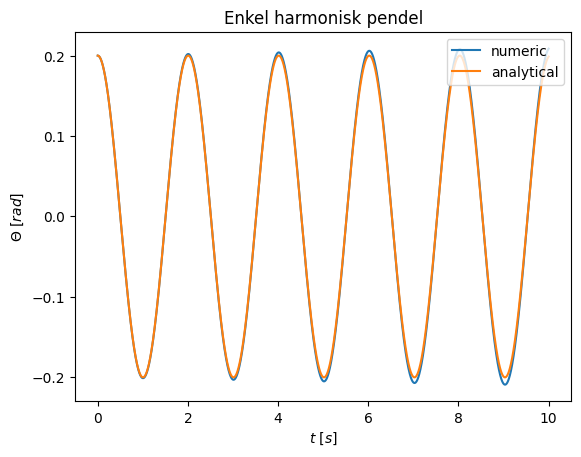

In [95]:
dt = [0.001, 0.004, 0.007]
data = [euler_method(theta_0, theta_dot_0, i, T) for i in dt]

f = lambda t, w_0, A: A*np.cos(w_0*t)

i = 0
n = int(T / dt[i])
theta, w, t = data[i]
theta_exact = np.array([f(i, w_0, theta_0) for i in t])

fig, axs = plt.subplots()

axs.plot(t, theta, label='numeric')
axs.plot(t, theta_exact, label='analytical')
plt.title('Enkel harmonisk pendel')
plt.ylabel('$\Theta \ [rad]$')
plt.xlabel('$t \ [s]$')

plt.legend(loc='upper right')
plt.show()

**d)** Observer fra plottet over at amplituden til utslagsvinkel for den numeriske løsningen vil øke med tid. Om du ikke ser dette tydelig, så kan du prøve å øke tidssteget litt. Dersom du fortsatt ikke ser at amplituden øker kan det være du ufrivillig har implementert en semi-implisitt Euler-metode ($\textit{Symplectic Euler}$/$\textit{Euler–Cromer}$), dobbeltsjekk i så fall funksjonsdefinisjonen din.

Vi skal nå se på energien til pendelen, som vil hjelpe oss å forstå hva som skjer:
1. Vis at energien til pendelen er gitt ved $E = E_k + E_p = \frac{1}{2} m l^2 \omega^2 + \frac{1}{2} mgl\theta^2$ for små vinkelutslag.
*Hint:* Skriv ned det generelle utrykket for energi, og utrykk hastigheten i vinkelhastigheten. Definer nullpunktet for den postensielle energien der $\theta = 0$.


2. Skriv en funksjon som tar in verdier for $\theta$ og $\omega$, returnerer en array med den totale energien til pendelen.
*Hint:* Husk numpy arrays er kompatible med vanlige operatorer.


3. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$, $\Delta t = 0.004$ og $\Delta t = 0.007$. Husk å gi plottene passende label, og inkluder legend. Du vil observere at den totale energien øker med tid. Energien vil øke mindre for små tidssteg, men vil alltid øke litt. Vi må derfor benytte en annen metode for å få en fysisk løsning (dette skal vi implementere i neste øving)

---

1.

SKRIV HER (eller på papir)

---

In [ ]:
# 2.

def energy_calculation(theta, w):
    """
    Calculates total energy for each time which theta and omega is calculated for. 
    Assumes that the shapes of theta and w are compatible.
    
    theta: array of theta-values for the angular displacement
    w: array of w-values for the angular velocity
    """
    
    # SKRIV KODE HER
    """
    E_total: array with the total energy found from values of theta and w (omega)
    """
    
    E_total = 0.5*m*l**2*w**2 + 0.5*m*g*l*(theta)
    
    return E_total 

# 3.

# SKRIV KODE FOR Å PLOTTE ENERGIEN HER